In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import tensorflow as tf
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("Fertilizer_Prediction.csv")

In [3]:
data.head(5)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
data['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [5]:
data['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [6]:
data['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

<AxesSubplot:xlabel='Soil Type', ylabel='count'>

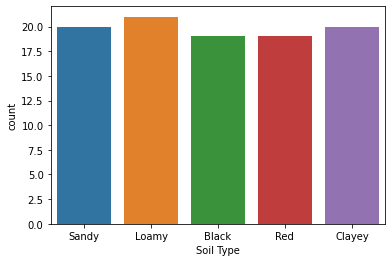

In [11]:
sns.countplot(x='Soil Type', data = data)

<AxesSubplot:xlabel='Crop Type', ylabel='count'>

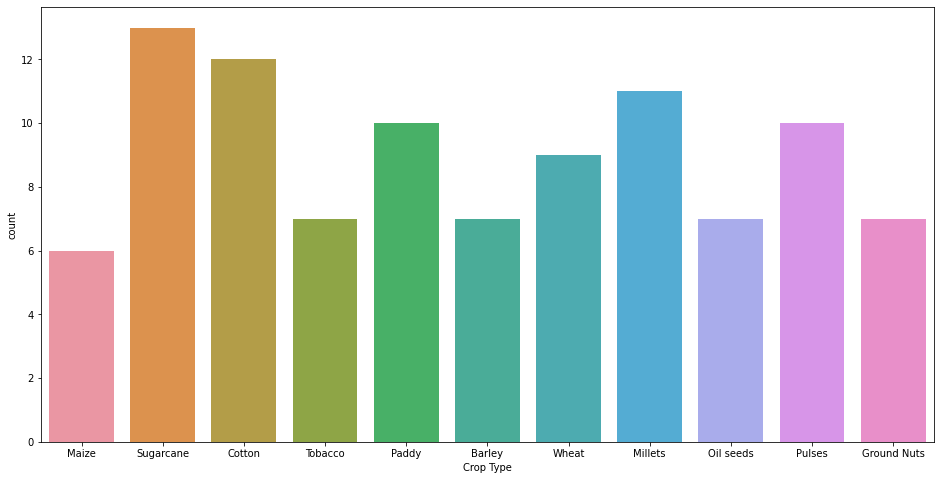

In [12]:
plt.figure(figsize=(16,8))
sns.countplot(x='Crop Type', data = data)

In [16]:
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = data['Fertilizer Name'])
    
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = data['Fertilizer Name'], ax=axes[1])

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


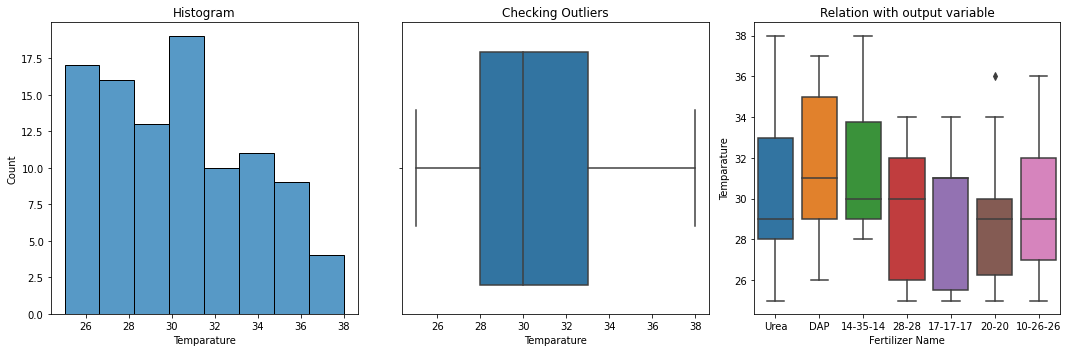

In [17]:
#EDA - Temparature variable
plot_conti(data['Temparature'])

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


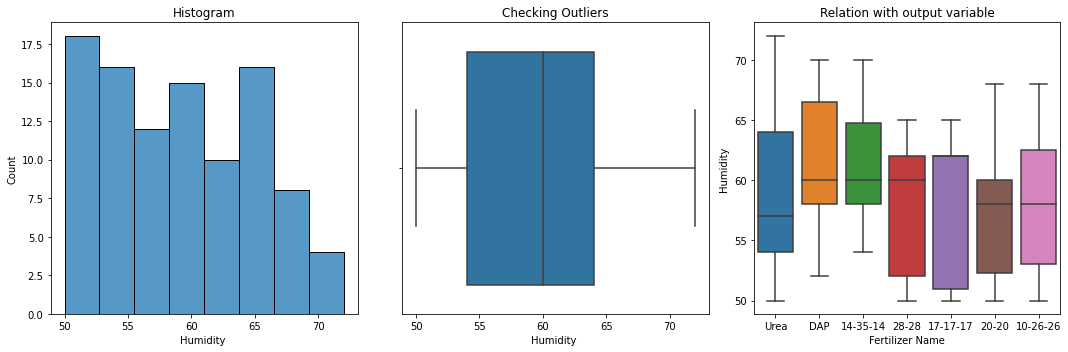

In [18]:
plot_conti(data['Humidity '])

In [21]:
# Convert categorical variables into numerical labels
data['Soil Type'] = data['Soil Type'].astype('category').cat.codes
data['Crop Type'] = data['Crop Type'].astype('category').cat.codes

In [22]:
data

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,Urea
1,29,52,45,2,8,12,0,36,DAP
2,34,65,62,0,1,7,9,30,14-35-14
3,32,62,34,3,9,22,0,20,28-28
4,28,54,46,1,6,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,1,7,24,0,19,28-28
95,30,60,27,3,9,4,17,17,10-26-26
96,38,72,51,2,10,39,0,0,Urea
97,36,60,43,4,4,15,0,41,DAP


In [24]:
# Separate features and target variable
X = data.drop('Fertilizer Name', axis=1)
y = data['Fertilizer Name']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Create and train the Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [32]:
# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
metric = classification_report(y_test, y_pred)
print('Evaluation Performance:', metric)

Evaluation Performance:               precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [30]:
import pickle

In [31]:
# Save the trained model as a pickle file
with open('naivebayes.pkl', 'wb') as file:
    pickle.dump(model, file)